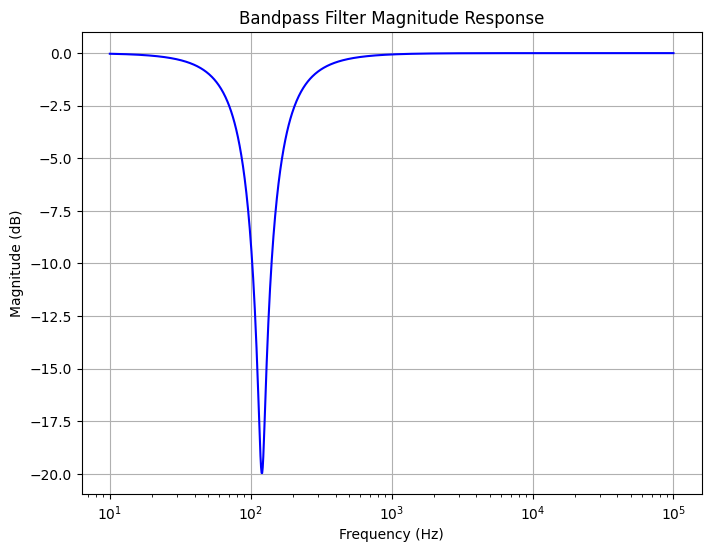

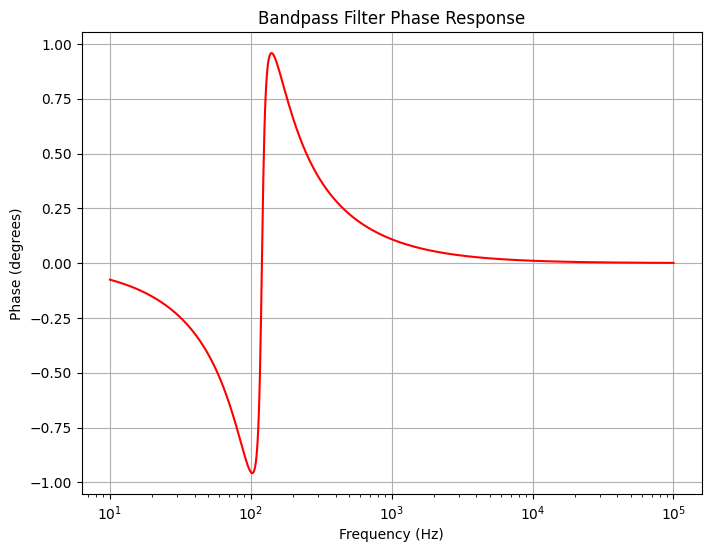

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqs

# Parameters
K0 = 1.0       # Overall gain
f_c   = 120.0 
Q     = 1
alpha = 10
K0    = 1.0

# 2*pi*f_c
omega_c = 2.0 * np.pi * f_c

b = [
    K0,                      # coefficient of s^2
    K0 * (omega_c / (alpha * Q)),  # coefficient of s
    K0 * (omega_c**2)             # constant term
]

a = [
    1.0,               # coefficient of s^2
    (omega_c / Q),     # coefficient of s
    (omega_c**2)       # constant term
]

# 1) Define frequency range in Hz
f_min = 10      # 10 Hz
f_max = 1e5     # 100 kHz
num_points = 1000
f = np.logspace(np.log10(f_min), np.log10(f_max), num_points)  # in Hz

# 2) Convert f (Hz) to w (rad/s)
w = 2 * np.pi * f

# 3) Use freqs to get the frequency response
w, H = freqs(b, a, w)

# Convert magnitude to dB
mag_db = 20 * np.log10(np.abs(H))
# Phase in degrees
phase_deg = np.angle(H, deg=False)

# 4) Plot with frequency in Hz (f on the x-axis)
plt.figure(figsize=(8, 6))
plt.semilogx(f, mag_db, 'b')
plt.title('Bandpass Filter Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.figure(figsize=(8, 6))
plt.semilogx(f, phase_deg, 'r')
plt.title('Bandpass Filter Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(True)

plt.show()


# Calculate filter coefficients

Digital numerator coefficients (b): [ 0.99237207 -1.98275923  0.99067697]
Digital denominator coefficients (a): [ 1.         -1.98275923  0.98304904]


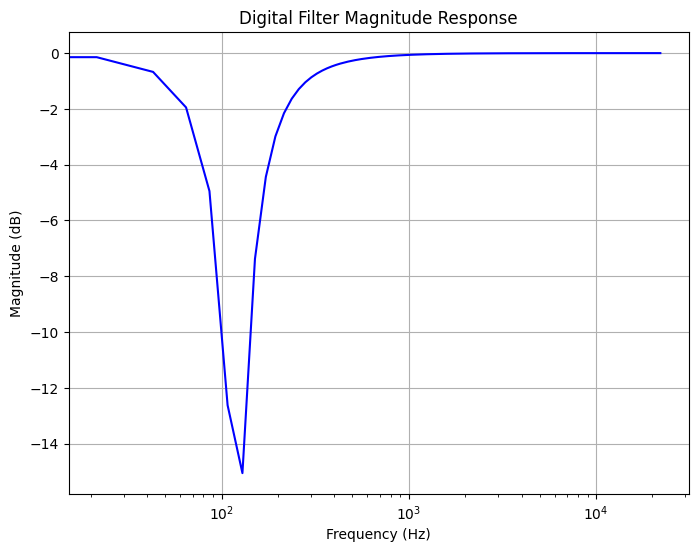

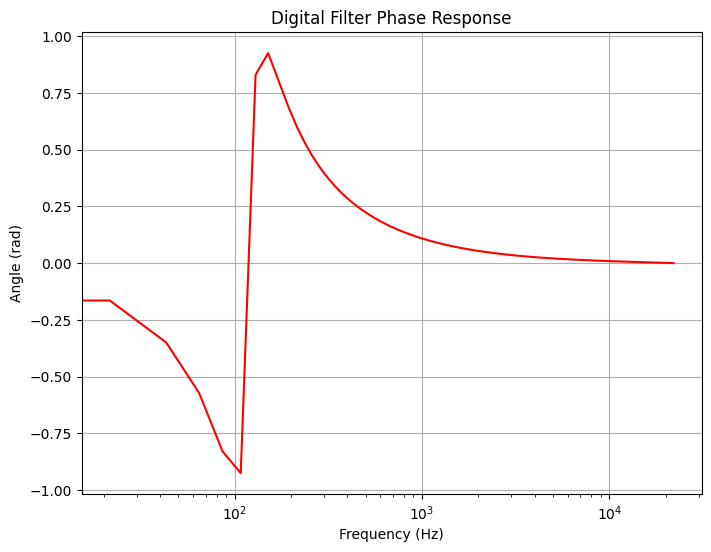

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, bilinear

# Parameters
K0 = 1.0       # Overall gain
f_c   = 120.0 
Q     = 1
alpha = 10
K0    = 1.0
fs = 44100.0

# 2*pi*f_c
omega_c = 2.0 * np.pi * f_c

b_analog = [
    K0,                      # coefficient of s^2
    K0 * (omega_c / (alpha * Q)),  # coefficient of s
    K0 * (omega_c**2)             # constant term
]

a_analog = [
    1.0,               # coefficient of s^2
    (omega_c / Q),     # coefficient of s
    (omega_c**2)       # constant term
]

# Convert to digital filter coefficients using the bilinear transform
b_digital, a_digital = bilinear(b_analog, a_analog, fs)

# Compute the frequency response of the digital filter
# freqz returns frequency (w) in rad/sample and the complex frequency response (h)
w, h = freqz(b_digital, a_digital, worN=1024)

# Convert frequency to Hz: f = (w / (2*pi)) * fs; but since w is in rad/sample,
# we can directly compute frequency in Hz as:
f = w * fs / (2 * np.pi)

# Compute magnitude in dB and phase in degrees
magnitude_dB = 20 * np.log10(np.abs(h))
phase_rad = np.angle(h, deg=False)

print("Digital numerator coefficients (b):", b_digital)
print("Digital denominator coefficients (a):", a_digital)

# Plot magnitude response
plt.figure(figsize=(8, 6))
plt.semilogx(f, magnitude_dB, 'b')
plt.title('Digital Filter Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

# Plot phase response
plt.figure(figsize=(8, 6))
plt.semilogx(f, phase_rad, 'r')
plt.title('Digital Filter Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Angle (rad)')
plt.grid(True)

plt.show()
